In [77]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd

In [78]:
df = pd.read_csv("fertilizer_prediction.csv")
df, df.columns

(      Temperature  Humidity  Moisture   pH    N    P    K       Crop  \
 0            32.0      60.0      45.0  6.0  0.4  0.5  0.8      Maize   
 1            35.0      66.0      48.0  5.8  0.2  0.7  0.6      Maize   
 2            35.0      66.0      48.0  5.8  0.2  0.7  0.6      Maize   
 3            29.0      36.0      17.0  6.5  0.3  0.7  0.6      Maize   
 4            29.0      36.0      17.0  6.5  0.3  0.7  0.6      Maize   
 ...           ...       ...       ...  ...  ...  ...  ...        ...   
 1915         31.0      48.0      66.0  6.0  0.8  0.8  0.9  Sugarcane   
 1916         31.0      48.0      66.0  6.0  0.9  0.8  0.9  Sugarcane   
 1917         35.0      54.0      71.0  6.4  0.7  0.9  0.9  Sugarcane   
 1918         35.0      54.0      71.0  6.4  0.8  0.9  0.9  Sugarcane   
 1919         35.0      54.0      71.0  6.4  0.9  0.9  0.9  Sugarcane   
 
      Fertilizer  
 0      Good NPK  
 1           MOP  
 2          Urea  
 3           MOP  
 4          Urea  
 ...    

In [79]:
df['Fertilizer'].value_counts()

Fertilizer
MOP         1207
Good NPK     320
DAP          245
Urea         148
Name: count, dtype: int64

In [80]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Fertilizer'
label_encoder_fertilizer = LabelEncoder()
df['Fertilizer'] = label_encoder_fertilizer.fit_transform(df['Fertilizer'])

# Display the DataFrame
print(df)

# Create a mapping table for 'Fertilizer'
fertilizer_mapping = pd.DataFrame({
    'Fertilizer': label_encoder_fertilizer.classes_,
    'Encoded Value': label_encoder_fertilizer.transform(label_encoder_fertilizer.classes_)
})

print("\nFertilizer Encoding Mapping:")
print(fertilizer_mapping)

      Temperature  Humidity  Moisture   pH    N    P    K       Crop  \
0            32.0      60.0      45.0  6.0  0.4  0.5  0.8      Maize   
1            35.0      66.0      48.0  5.8  0.2  0.7  0.6      Maize   
2            35.0      66.0      48.0  5.8  0.2  0.7  0.6      Maize   
3            29.0      36.0      17.0  6.5  0.3  0.7  0.6      Maize   
4            29.0      36.0      17.0  6.5  0.3  0.7  0.6      Maize   
...           ...       ...       ...  ...  ...  ...  ...        ...   
1915         31.0      48.0      66.0  6.0  0.8  0.8  0.9  Sugarcane   
1916         31.0      48.0      66.0  6.0  0.9  0.8  0.9  Sugarcane   
1917         35.0      54.0      71.0  6.4  0.7  0.9  0.9  Sugarcane   
1918         35.0      54.0      71.0  6.4  0.8  0.9  0.9  Sugarcane   
1919         35.0      54.0      71.0  6.4  0.9  0.9  0.9  Sugarcane   

      Fertilizer  
0              1  
1              2  
2              3  
3              2  
4              3  
...          ...  
19

In [81]:
df = pd.get_dummies(df, columns=['Crop'])
df.head(), df.columns

(   Temperature  Humidity  Moisture   pH    N    P    K  Fertilizer  \
 0         32.0      60.0      45.0  6.0  0.4  0.5  0.8           1   
 1         35.0      66.0      48.0  5.8  0.2  0.7  0.6           2   
 2         35.0      66.0      48.0  5.8  0.2  0.7  0.6           3   
 3         29.0      36.0      17.0  6.5  0.3  0.7  0.6           2   
 4         29.0      36.0      17.0  6.5  0.3  0.7  0.6           3   
 
    Crop_Coconut  Crop_Cotton  Crop_Groundnut  Crop_Jowar  Crop_Maize  \
 0         False        False           False       False        True   
 1         False        False           False       False        True   
 2         False        False           False       False        True   
 3         False        False           False       False        True   
 4         False        False           False       False        True   
 
    Crop_Rice  Crop_Sugarcane  Crop_Wheat  
 0      False           False       False  
 1      False           False       False  


In [82]:
X = df.drop(['Fertilizer'], axis='columns')
y = df['Fertilizer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Logistic Regression Classification Report:

              precision    recall  f1-score   support

         DAP       0.31      0.31      0.31        42
    Good NPK       0.92      0.92      0.92        64
         MOP       0.82      0.85      0.83       244
        Urea       0.61      0.41      0.49        34

    accuracy                           0.77       384
   macro avg       0.66      0.62      0.64       384
weighted avg       0.76      0.77      0.76       384


Decision Tree Classification Report:

              precision    recall  f1-score   support

         DAP       0.56      0.67      0.61        42
    Good NPK       0.94      0.91      0.92        64
         MOP       0.90      0.91      0.91       244
        Urea       0.42      0.29      0.34        34

    accuracy                           0.83       384
   macro avg       0.70      0.70      0.70       384
weighted avg       0.83      0.83      0.83       384


Random Forest Classification Report:

       

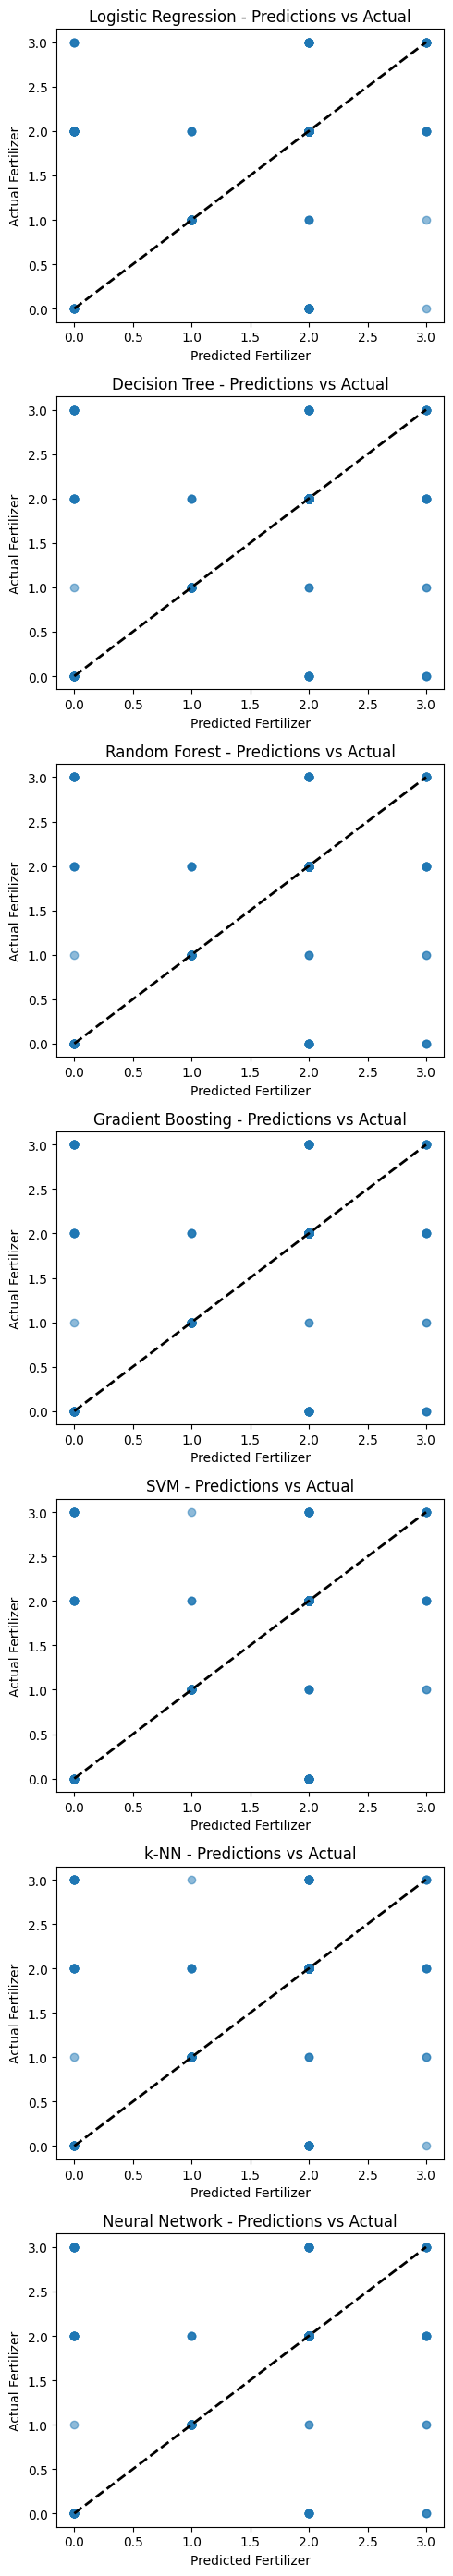

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

# Train models, make predictions, and collect results
results = []
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))
    predictions[name] = y_pred
    print(f"\n{name} Classification Report:\n")
    # Check unique classes in y_test and y_pred to ensure compatibility
    target_names = label_encoder_fertilizer.classes_
    print(classification_report(y_test, y_pred, target_names=target_names))

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])

# Print the results table
print("\nModel Performance Comparison:")
print(results_df)

# Plotting predictions vs actual for each model
fig, axes = plt.subplots(len(models), 1, figsize=(5, 4 * len(models)))

for idx, (name, y_pred) in enumerate(predictions.items()):
    ax = axes[idx]
    ax.scatter(y_pred, y_test, alpha=0.5)
    ax.set_title(f"{name} - Predictions vs Actual")
    ax.set_xlabel("Predicted Fertilizer")
    ax.set_ylabel("Actual Fertilizer")
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.tight_layout()
plt.show()

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, y_train, y_test are defined and split appropriately

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

results = []
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))
    predictions[name] = y_pred
    print(f"\n{name} Classification Report:\n")
    # Check unique classes in y_test and y_pred to ensure compatibility
    target_names = label_encoder_fertilizer.classes_
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    # Assuming `history` is available for each model, e.g., from Keras/TensorFlow
    history = model.history  # Adjust this based on how you store history

    # Plotting training and validation accuracy and loss
    plt.figure(figsize=(15, 10))

    # Plot training & validation accuracy values
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{name} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{name} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])

# Print the results table
print("\nModel Performance Comparison:")
print(results_df)

# Plotting predictions vs actual for each model
fig, axes = plt.subplots(len(models), 1, figsize=(10, 6 * len(models)))

for idx, (name, y_pred) in enumerate(predictions.items()):
    ax = axes[idx]
    ax.plot(y_test.values, marker='o', linestyle='', label='Actual')
    ax.plot(y_pred, marker='x', linestyle='', label='Predicted')
    ax.set_title(f"{name} - Predictions vs Actual")
    ax.set_xlabel("Sample Index")
    ax.set_ylabel("Fertilizer")
    ax.legend()

plt.tight_layout()
plt.show()


Logistic Regression Classification Report:

              precision    recall  f1-score   support

         DAP       0.49      0.33      0.39        52
    Good NPK       0.89      0.86      0.87        64
         MOP       0.80      0.90      0.85       239
        Urea       0.61      0.38      0.47        29

    accuracy                           0.78       384
   macro avg       0.70      0.62      0.65       384
weighted avg       0.76      0.78      0.76       384



AttributeError: 'LogisticRegression' object has no attribute 'history'

In [ ]:
#Nishanth

In [9]:
model = Sequential()
model.add(Input((X.shape[1],)))
model.add(Dense(32, kernel_initializer="uniform", activation='relu'))
model.add(Dense(32, kernel_initializer="uniform", activation='relu'))
model.add(Dense(y.shape[1], kernel_initializer="uniform", activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)

In [12]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Test loss: 0.34382376074790955
Test accuracy: 0.8298611044883728


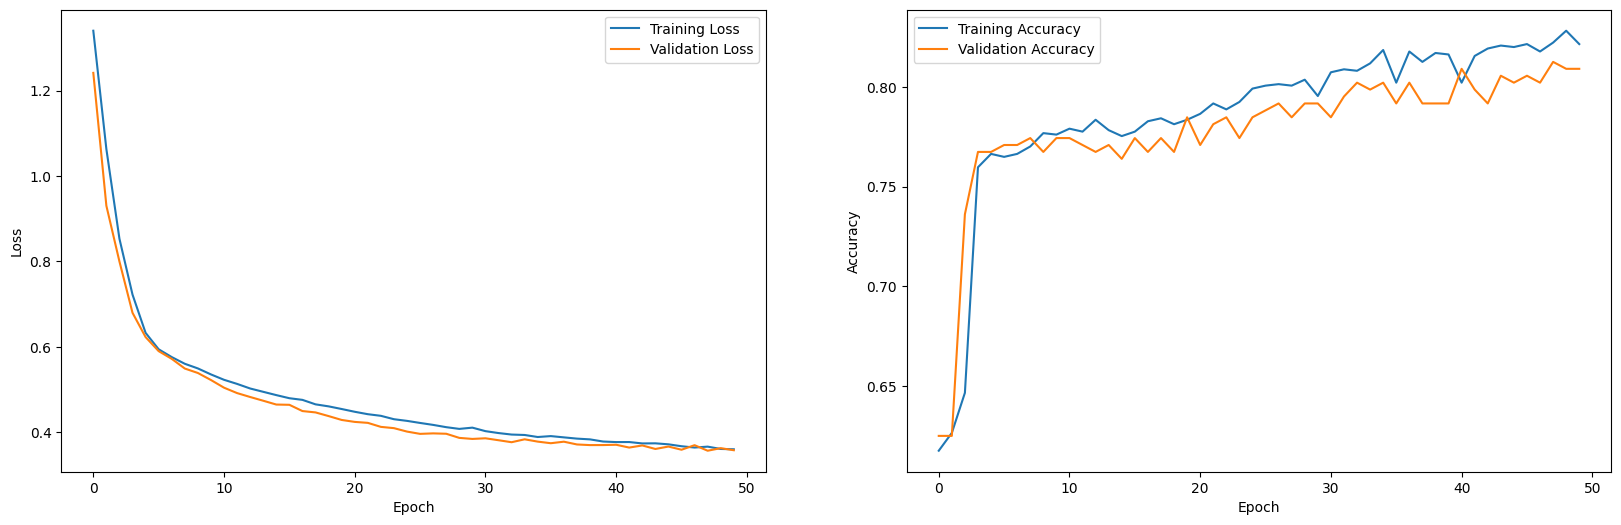

In [13]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [14]:
output_values = model.predict(X_test)

print("Output values for the new inputs:")
print(output_values[100])
for i in output_values[100]:
    print(f"{i:.2f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Output values for the new inputs:
[0.01169891 0.15502298 0.23862404 0.594654  ]
0.01
0.16
0.24
0.59
